# Table of Contents
 <p><div class="lev1"><a href="#Import-Data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data</a></div><div class="lev2"><a href="#Filter-data"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Filter data</a></div><div class="lev1"><a href="#Fitting-GP"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting GP</a></div><div class="lev1"><a href="#Fitting-hyperparameters"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting hyperparameters</a></div><div class="lev2"><a href="#Fit-variogram"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit variogram</a></div><div class="lev2"><a href="#Likelihood-fit"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Likelihood fit</a></div><div class="lev2"><a href="#Full-Bayesian"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Full Bayesian</a></div>

In [1]:
require(geoR)

Loading required package: geoR
--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.7-5.2 (built on 2016-05-02) is now loaded
--------------------------------------------------------------



# Import Data

In [2]:
Tucson_sales=read.csv("Tucson_data/processed/Tucson_sales.csv", 
    colClasses=c("SaleDate"="character",
                 "ADDRESS"="character"))
head(Tucson_sales)

X,ADDRESS,ADPARCEL_,ADPARCEL_I,ADR_ID,AD_STREET,AD_SUFFIX,ANGLE,AREA,CITY_ID,⋯,LANDMEAS,LANDUNIT,LANDFCV,LUV,SOURCELand,APPRAISERLand,PHONELand,SchDistr,X_PRJ,Y_PRJ
10120025B,5141 N CASA GRANDE HY,103086,296800,295994,CASA GRANDE,HY,0,0,TUC,⋯,32272,F,80680,2.5,,Donald B.,724-7426,Flowing Wells Unified District,772027.3,474087.0
10120025B,5141 N CASA GRANDE HY,103086,296800,295994,CASA GRANDE,HY,0,0,TUC,⋯,32272,F,80680,2.5,,Donald B.,724-7426,Flowing Wells Unified District,772027.3,474087.0
101211250,3980 W KILEY CT,101122,298792,297979,KILEY,CT,0,0,TUC,⋯,NA,,NA,NA,,,,Flowing Wells Unified District,767978.9,474944.4
101211250,3980 W KILEY CT,101122,298792,297979,KILEY,CT,0,0,TUC,⋯,NA,,NA,NA,,,,Flowing Wells Unified District,767978.9,474944.4
101211250,3980 W KILEY CT,101122,298792,297979,KILEY,CT,0,0,TUC,⋯,NA,,NA,NA,,,,Flowing Wells Unified District,767978.9,474944.4
101211260,3981 W KILEY CT,101634,298278,297465,KILEY,CT,0,0,TUC,⋯,NA,,NA,NA,,,,Flowing Wells Unified District,767947.1,474720.7


In [3]:
levels(Tucson_sales$ValidationDescription)

[1] ""                                                                      
 [2] "Buyer/Seller are related parties or corporate entities"                
 [3] "Buyer/Seller has an Out-Of-State Address"                              
 [4] "Buyer/Seller is a Non-Profit institution"                              
 [5] "Correction of previously recorded deed                 "               
 [6] "Deed to quiet title and avoid court action"                            
 [7] "Developers discount/value by Land manual"                              
 [8] "FCV established by B.O.E. or State Board"                              
 [9] "Good Sale"                                                             
[10] "Improvements not yet on assessment roll"                               
[11] "Internet sale"                                                         
[12] "Lease or agreement"                                                    
[13] "More than five (5) parcels being sold"                                 
[14] "Name/Address of Buyer or Seller is missing"                            
[15] "Notary stamp or signature is missing"                                  
[16] "Property altered since date of sale"                                   
[17] "Property type/use code are not consistent"                             
[18] "Release of security for a debt or obligation"                          
[19] "Sale by subsidiary corp. to parent corp.                              "
[20] "Sale includes quantifiable Personal Property > 5%"                     
[21] "Sale includes unquantifiable Personal Property > 5%"                   
[22] "Sale involves exchange or trade"                                       
[23] "Sale of contaminated property"                                         
[24] "Sale of partial interest"                                              
[25] "Sale price missing"                                                    
[26] "Sale pursuant to a court order"                                        
[27] "Sale to or from a government agency"                                   
[28] "Sale under duress"                                                     
[29] "Split legislative class/assessment ratio"                              
[30] "Trust sale of nominal consideration or convenience"                    
[31] "Unknown"                                                               
[32] "Unsecured Mobile Home"                                                 
[33] "Unusable sale which does not fit any other reject codes"

## Filter data

In [4]:
believable = (
    Tucson_sales$ValidationDescription %in% c("Good Sale", "Buyer/Seller has an Out-Of-State Address")
    & Tucson_sales$PropertyType %in% c("2-4 Plex", "Condo/Townhouse", "Single Family")
    & Tucson_sales$BuyerSellerRelated == "No"
    & Tucson_sales$PartialInterest == "No"
)

In [5]:
schdistrs = levels(Tucson_sales$SchDistr)
print(schdistrs)

[1] "Amphitheater Unified District"  "Flowing Wells Unified District"
[3] "Sunnyside Unified District"     "Tanque Verde Unified District" 
[5] "Tucson Unified District"        "Vail Unified District"         


# Fitting GP

In [6]:
require(MASS)

Loading required package: MASS


In [7]:
colnames(Tucson_sales)

[1] "X"                     "ADDRESS"               "ADPARCEL_"            
  [4] "ADPARCEL_I"            "ADR_ID"                "AD_STREET"            
  [7] "AD_SUFFIX"             "ANGLE"                 "AREA"                 
 [10] "CITY_ID"               "CODE"                  "DATE_ENTER"           
 [13] "LAT"                   "LON"                   "PERIMETER"            
 [16] "POLYGONID"             "SCALE"                 "SOURCE"               
 [19] "STATUS"                "STREET"                "STREET_DIR"           
 [22] "STREET_IDX"            "STREET_NAM"            "STREET_NO"            
 [25] "SUFFIX_DIR"            "TILE_NAME"             "X_HPGN"               
 [28] "Y_HPGN"                "ZIPCITY"               "ZIPCODE"              
 [31] "geometry"              "SequenceNum"           "SaleDate"             
 [34] "SalePrice"             "PropertyType"          "IntendedUse"          
 [37] "Deed"                  "Financing"             "ValidationDescription"
 [40] "BuyerSellerRelated"    "Solar"                 "PersonalProperty"     
 [43] "PartialInterest"       "RecordingDate"         "TAXYEAR"              
 [46] "SFRCONDO"              "COMPLEXID"             "INSPECTION"           
 [49] "CLASS"                 "STORIES"               "ROOMS"                
 [52] "QUALITY"               "WALLS"                 "ROOF"                 
 [55] "HEAT"                  "COOL"                  "BATHFIXTUR"           
 [58] "PATIO"                 "PATIONUMBE"            "CONDITION"            
 [61] "SQFT"                  "YEAR"                  "GARAGE"               
 [64] "GARAGECAPA"            "POOLAREA"              "MAIN"                 
 [67] "CONTROL"               "ACTUAL"                "LASTACTION"           
 [70] "VALUATIONC"            "APPLICATION"           "ENHANCEMEN"           
 [73] "ADJUSTMENT"            "APPRAISER"             "PHONE"                
 [76] "TAXYEARAdds"           "BLDG_ID"               "SFRCONDOAdds"         
 [79] "OCCUPANCY"             "DETACHED"              "CLASSAdds"            
 [82] "QUALITYAdds"           "YEARAdds"              "SQFTAdds"             
 [85] "STORIESAdds"           "HEATAdds"              "COOLAdds"             
 [88] "WALLSAdds"             "ROOFAdds"              "GARAGEAdds"           
 [91] "GARAGECAPAAdds"        "PATIOAdds"             "PATIONUMBEAdds"       
 [94] "MAINFCV"               "ENHANCEMENAdds"        "VALUATIONCAdds"       
 [97] "MAINAdds"              "ACTUALAdds"            "ADJUSTMENTAdds"       
[100] "LANDMEAS"              "LANDUNIT"              "LANDFCV"              
[103] "LUV"                   "SOURCELand"            "APPRAISERLand"        
[106] "PHONELand"             "SchDistr"              "X_PRJ"                
[109] "Y_PRJ"

In [8]:
for_geodata = Tucson_sales[believable,c("X_PRJ","Y_PRJ","SalePrice","SchDistr", "SQFT", "SaleDate", "QUALITY")]
for_geodata$logSalePrice = log(for_geodata$SalePrice)
for_geodata$iSchDistr = as.numeric(for_geodata$SchDistr)
# I feel like we shouldn't need to do this:
for_geodata[,c("X_PRJ","Y_PRJ")] = jitterDupCoords(for_geodata[,c("X_PRJ","Y_PRJ")], max=10, min=1)
print(nrow(for_geodata))
for_geodata = na.omit(for_geodata)
print(nrow(for_geodata))

[1] 23759
[1] 22203


In [9]:
print(colnames(for_geodata))

[1] "X_PRJ"        "Y_PRJ"        "SalePrice"    "SchDistr"     "SQFT"        
[6] "SaleDate"     "QUALITY"      "logSalePrice" "iSchDistr"   


In [10]:
Tucson_geodata=as.geodata(for_geodata, 
    coords.col=c(1,2), 
    data.col=8, 
    covar.col=c("SQFT", "SaleDate", "QUALITY"),
    realisations=9, 
    rep.data.action="none" # why can't we have repeated locations?
    )

In [11]:
Tucson.variog = variog(Tucson_geodata, pairs.min=20, breaks=seq(0,100000,1000))

variog: computing omnidirectional variogram


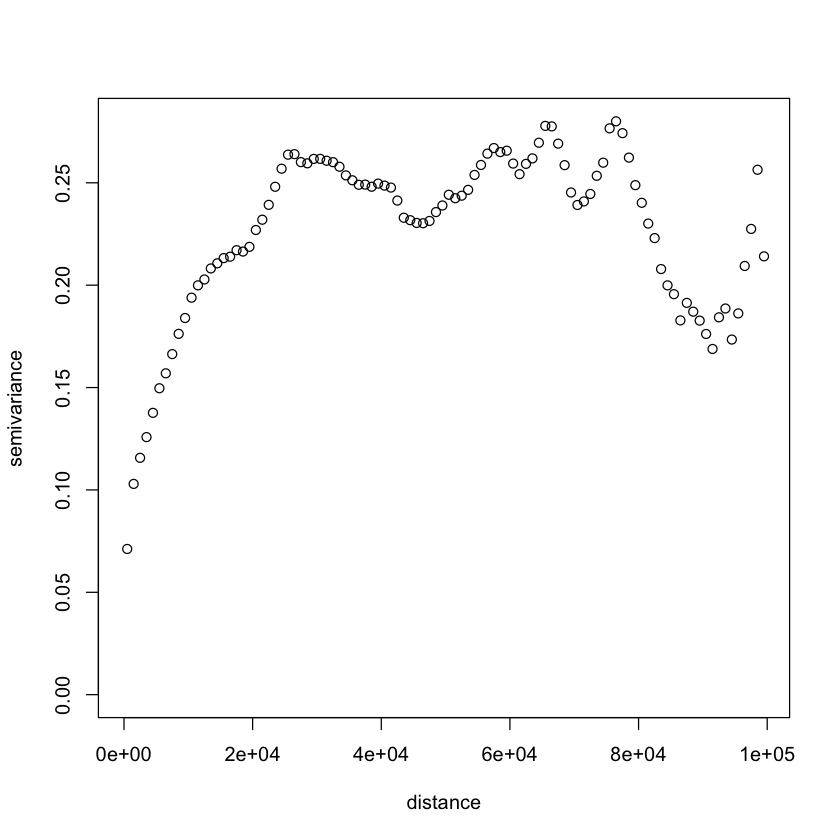

In [12]:
plot(Tucson.variog)

# Fitting hyperparameters
## Fit variogram

In [13]:
Tucson.variog.fit = variofit(Tucson.variog, 
    cov.model="gaussian", 
    ini.cov.pars=c(0.01,20000), 
    nugget=0.1, )

variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


In [14]:
Tucson.cressie.fit = variofit(Tucson.variog, 
    cov.model="gaussian", 
    weights="cressie",
    ini.cov.pars=c(0.01,20000), 
    nugget=0.11, )

variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 


Initialize Cressie fit with fitted parameters with default weights.

In [15]:
Tucson.cressie.fit.2 = variofit(Tucson.variog, 
    cov.model="gaussian", 
    weights="cressie",
    ini.cov.pars=Tucson.variog.fit, 
    nugget=0.11, )

variofit: covariance model used is gaussian 
variofit: weights used: cressie 
variofit: minimisation function used: optim 


In [16]:
Tucson.variog.fit

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
     tausq    sigmasq        phi 
    0.1257     0.1245 13441.0537 
Practical Range with cor=0.05 for asymptotic range: 23264.02

variofit: minimised weighted sum of squares = 48313.69

In [17]:
Tucson.cressie.fit

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
   tausq  sigmasq      phi 
1.59e-01 9.85e-02 2.00e+04 
Practical Range with cor=0.05 for asymptotic range: 34616.37

variofit: minimised weighted sum of squares = 1453954

In [18]:
Tucson.cressie.fit.2

variofit: model parameters estimated by WLS (weighted least squares):
covariance model is: gaussian
parameter estimates:
     tausq    sigmasq        phi 
    0.1250     0.1263 13441.0537 
Practical Range with cor=0.05 for asymptotic range: 23264.02

variofit: minimised weighted sum of squares = 896048

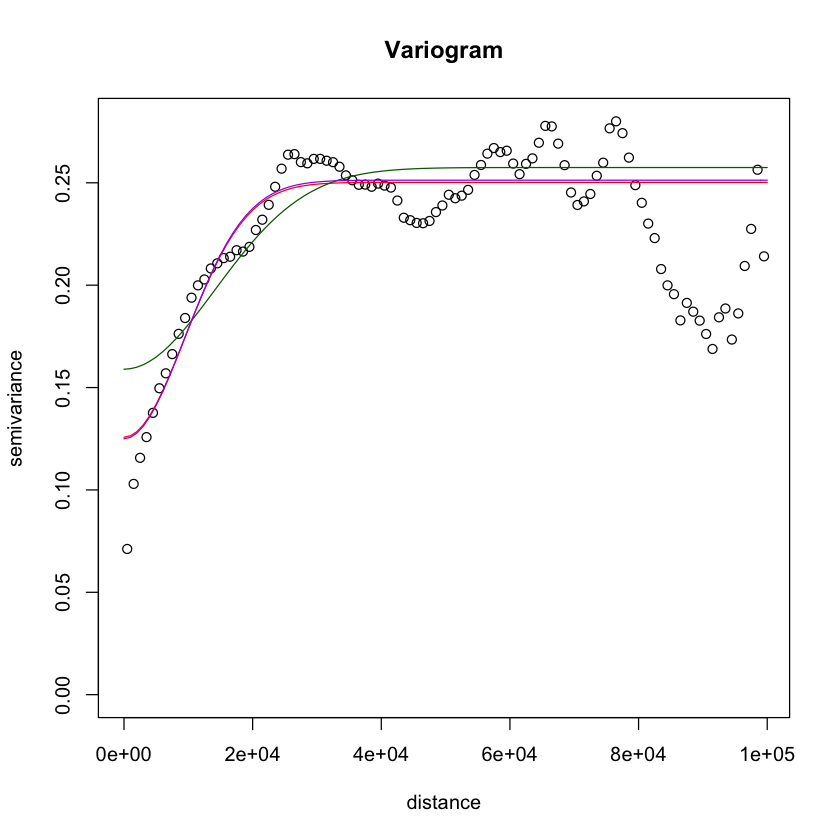

In [19]:
plot(Tucson.variog, main="Variogram")
lines(Tucson.variog.fit, col="red")
lines(Tucson.cressie.fit, col="dark green")
lines(Tucson.cressie.fit.2, col="purple")

Fitting the variogram directly is computationally very efficient, but doesn't seem fully justified from a theoretical standpoint. I'm also not entirely convinced by the implementation of the optimization. With the Cressie weights, $\phi$ remained stuck on 20000. Changing the initial parameters has a large effect, which is not a reasonable behavior. We don't see the same behavior with the default weights, although I have seen it misbehave as well.

In [20]:
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.01,20000), 
    nugget=0.1, 
    weights="cressie",
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,20000), 
    nugget=0.1, 
    weights="cressie",
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,10000),
    nugget=0.1,
    weights="cressie",
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.2,11000), 
    nugget=0.01, 
    weights="cressie",
    );c(f$nugget, f$cov.pars, f$value)

[1] 1.589551e-01 9.850506e-02 2.000000e+04 1.453954e+06

[1] 1.589545e-01 9.850632e-02 2.000000e+04 1.453954e+06

[1] 1.032718e-01 1.442152e-01 1.000000e+04 1.046226e+06

[1] 1.210568e-01 1.295307e-01 1.279757e+04 8.890293e+05

In [21]:
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.01,20000), 
    nugget=0.1, 
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,20000), 
    nugget=0.1, 
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.1,10000),
    nugget=0.1,
    );c(f$nugget, f$cov.pars, f$value)
f=variofit(Tucson.variog, cov.model="gaussian", messages=FALSE,
    ini.cov.pars=c(0.2,11000), 
    nugget=0.01, 
    );c(f$nugget, f$cov.pars, f$value)

[1] 1.257300e-01 1.244774e-01 1.344105e+04 4.831369e+04

[1] 1.257301e-01 1.244770e-01 1.344092e+04 4.831369e+04

[1] 1.257308e-01 1.244765e-01 1.344106e+04 4.831369e+04

[1] 1.257305e-01 1.244766e-01 1.344092e+04 4.831369e+04

## Likelihood fit

I think (hope) this means we're maximizing the marginal likelihood. Because this is computationally intense, we'll restrict ourselves to just 2015 data.

In [30]:
recent_geodata = as.geodata(
    for_geodata[for_geodata$SaleDate>"b'2015",],
    coords.col=c(1,2), 
    data.col=8, 
    covar.col=c("SQFT", "SaleDate", "QUALITY"),
    realisations=9, 
    rep.data.action="none" # why can't we have repeated locations?
    )

In [31]:
print(length(Tucson_geodata$data))
print(length(recent_geodata$data))

[1] 22203
[1] 5349


In [33]:
Tucson.likfit = likfit(recent_geodata, 
    trend="cte", 
    ini.cov.pars=Tucson.variog.fit$cov.pars, 
    nugget=Tucson.variog.fit$nugget,
    cov.model="gaussian",
    print.pars=TRUE,
    realisations=TRUE,
    messages=TRUE,
    lik.method="ML",
    limits=pars.limits(phi=c(500,20000), tausq=c(0.01,0.2), sigmasq=c(0.1,0.3)),
    )

kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
     phi    tausq    kappa     psiA     psiR   lambda 
13441.05     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -1200.25347179418 
     phi    tausq    kappa     psiA     psiR   lambda 
13441.05     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -1200.25350908849 
     phi    tausq    kappa     psiA     psiR   lambda 
13441.05     0.20     0.50     0.00     1.00     1.00 
log-likelihood =  -1200.25343449986

In [35]:
Tucson.likfit$cov.pars

[1]     3.452622 13441.019176

In [36]:
Tucson.likfit$cov.pars

[1]     3.452622 13441.019176

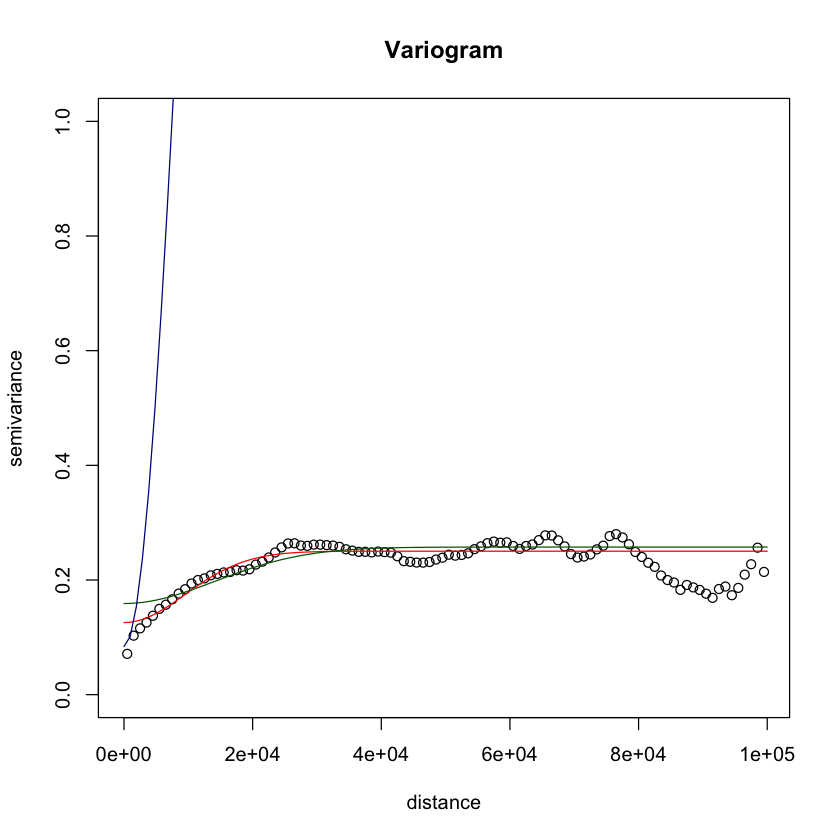

In [37]:
plot(Tucson.variog, main="Variogram", ylim=c(0,1.0))
lines(Tucson.variog.fit, col="red")
lines(Tucson.cressie.fit, col="dark green")
lines(Tucson.likfit, col="dark blue")

The final log-likelihood isn't as high as what we found using the Julia optimization routine, and the fitted value for $\sigma_f^2$ is ridiculous. The result doesn't fit the variogram at all.

## Full Bayesian

In [ ]:
tausq.rel.variogfit = Tucson.variog.fit$cov.pars[1] / Tucson.variog.fit$nugget
Tucson.bayes = krige.bayes(Tucson_geodata, 
    model = model.control(
        cov.model="gaussian",
        trend.d="cte",
        ),
    locations="no",
    prior = prior.control(
        phi.discrete=seq(Tucson.variog.fit$cov.pars[2]*0.9, Tucson.variog.fit$cov.pars[2]*1.1, length.out=11),
        phi.prior="reciprocal",
        sigmasq.prior="reciprocal",
        tausq.rel.prior="uniform",
        tausq.rel.discrete=seq(tausq.rel.variogfit*0.5, tausq.rel.variogfit*2.0, length.out=31)
        )
)

In [ ]:
plot(Tucson.variog, main="Variogram", ylim=c(0,0.3))
lines(Tucson.variog.fit, col="red")
lines(Tucson.likfit, col="dark blue")
lines(Tucson.bayes, summary.posterior=mean, col="orange") # posterior mean

The fitted Bayesian variogram (orange) is somewhere halfway between the MLE (blue) and the least squares fit (red). Having read a bit of Diggle's "Model-based Geostatistics", I now believe that maybe the poor variogram fit at high distances is not as big a problem as I thought. The MLE automatically attributes more weight to short distances, which is what we're seeing here.

There might also be some model misspecification here. The model is struggling to fit the zero-distance point, as well as the longer-range correlations. Perhaps a different kernel could be tried and would give better results.